<a href="https://colab.research.google.com/github/Ruoro/TSF-GRIPAPRIL22/blob/main/TSF_GRIP_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TSF GRIP TASK: PREDICTION USING SUPERVISED ML
## Data Science & Business Analystics Intern #GRIPAPRIL22
Author: Ruoro John 

Predicting the percentage of a student based on the no of study hours. 

## Import Libraries and data needed

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline


In [2]:
# Importing the dataset
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

There are 25 entries for the 2 columns

In [4]:
# Descriptive statistics of the dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
# Checking the values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


The data is in the correct data type

## Visualize the Data 

For quality analysis, we should plot a 2-D graph for the data. 

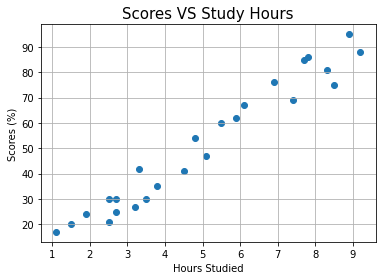

In [6]:
# Plotting a scatterplot of the data
plt.scatter(x= df.Hours, y= df.Scores)
plt.title ("Scores VS Study Hours", size=15)
plt.ylabel("Scores (%)") 
plt.xlabel("Hours Studied")
plt.grid()
plt.show()

Now, lets draw a regression plot to see the relation between Scores and Hours.

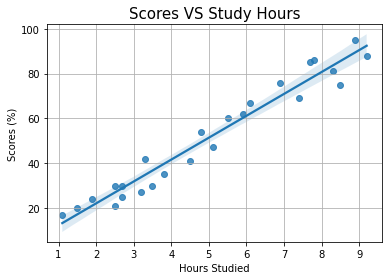

In [9]:
# Plotting a regression line to see the relationship between the scores and the hours studied.
sns.regplot(x = df.Hours, y = df.Scores)
plt.title ("Scores VS Study Hours", size=15)
plt.ylabel("Scores (%)") 
plt.xlabel("Hours Studied")
plt.grid()
plt.show()

Let's check the correlation.

In [10]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


The strength of association of the two values is quite high. The 0.976 correlation value confirm that there ia positive linear association. 

## Model Training

#### 1. Spliitng the data 

In [12]:
X = df.iloc[:, :-1]
y = df['Scores'].values
# X = X.reshape(1, -1)
X

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [13]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [14]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0,test_size=0.2)

In [15]:
# Lets look at the shape of the train and test data sets
print("X train.shape =", X_train.shape)
print("y train.shape =", y_train.shape)
print("X test.shape  =", X_test.shape)
print("y test.shape  =", y_test.shape)

X train.shape = (20, 1)
y train.shape = (20,)
X test.shape  = (5, 1)
y test.shape  = (5,)


The train and test set are separated in the 80:20 rule.


#### Fitting the data into the Model

In [16]:
# Let's import the linear regression 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [17]:
# model fitting 
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [18]:
#Find the intercept 
b0 = lr.intercept_
b0

2.018160041434662

In [19]:
#The coeff
b1 = lr.coef_
b1

array([9.91065648])

Let's test the model with the test dataset.

In [20]:
y_pred = lr.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [21]:
y_test

array([20, 27, 69, 30, 62])

The prediction is fairly accurate. Lets make a df to compare the actual and the prediction result side by side. 

In [22]:
y_test_list = list(y_test)
pred = list (y_pred)
comp_df = pd.DataFrame({'Actual': y_test_list, 'Predicted': pred})
comp_df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Model Evaluation

In [23]:
# Evaluating the model (metrics:r2score)
metrics.r2_score(y_test, y_pred)

0.9454906892105354

#### The model has an R2 score of 94% which means that the regression line is good. There is a high correlation between the hours studied and grades scored. 


#### Further metrics

In [24]:
# Determining the error of the model
MSE = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [25]:
print("The Mean Squared error =  ", MSE)
print("The Root Mean Squared Error = ", rmse)

The Mean Squared error =   21.598769307217456
The Root Mean Squared Error =  4.647447612100373


#### Making predictions

The main question was to check : what will be predicted score if a student studies for 9.25hrs/day?

In [28]:
hours_studied = 9.25
predicted_score = lr.predict([[hours_studied]])
print("predicted score for a student studying 9.25 hours :", predicted_score.round(2))

predicted score for a student studying 9.25 hours : [93.69]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


For a student studying 9.25 hours/day the predicted score is 93.69 (rounded score = 94)

## Conclusion

There is a correlation between the hours studied and the grades scored that can be predicted by a simple linear regression. 